In [123]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats

from sklearn.preprocessing import LabelEncoder, StandardScaler
ss = StandardScaler()
label = LabelEncoder()

from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV

from imblearn.over_sampling import SMOTE
over_sample = SMOTE()

from sklearn import metrics 
from sklearn.metrics import f1_score, accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc



from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()



import warnings
warnings.filterwarnings('ignore')

In [124]:
train = pd.read_csv('adult.csv')
train.head(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [125]:
train.shape

(32561, 15)

In [126]:
train.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'country', 'salary'],
      dtype='object')

In [127]:
train.describe(include = 'all')

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
count,32561.000000,32561,3.256100e+04,32561,32561.000000,32561,32561,32561,32561,32561,32561.000000,32561.000000,32561.000000,32561,32561
unique,NaN,9,NaN,16,NaN,7,15,6,5,2,NaN,NaN,NaN,42,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,22696,NaN,10501,NaN,14976,4140,13193,27816,21790,NaN,NaN,NaN,29170,24720
mean,38.581647,NaN,1.897784e+05,NaN,10.080679,NaN,NaN,NaN,NaN,NaN,1077.648844,87.303830,40.437456,NaN,NaN
std,13.640433,NaN,1.055500e+05,NaN,2.572720,NaN,NaN,NaN,NaN,NaN,7385.292085,402.960219,12.347429,NaN,NaN
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.178270e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.783560e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,2.370510e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


In [128]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  country         32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


# Data exploratation

In [129]:
train.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
country           0
salary            0
dtype: int64

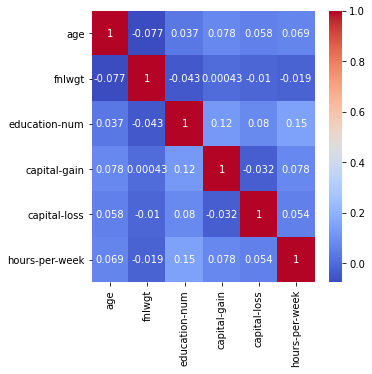

In [130]:
corr = train.corr()
plt.figure(figsize = (5,5))
sns.heatmap(corr, cmap = 'coolwarm', annot = True)

In [131]:
train['salary'].unique()

array([' <=50K', ' >50K'], dtype=object)

In [132]:
train['salary'] = train['salary'].replace([' <=50K'], 1)
train['salary'] = train['salary'].replace([' >50K'], 0)

In [133]:
train['salary'].unique()

array([1, 0], dtype=int64)

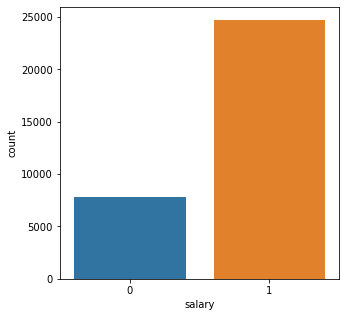

In [134]:
plt.figure(figsize =(5,5))
sns.countplot(train['salary'])

# Checking Outliers

In [135]:
num_train = train.select_dtypes(np.number)

In [136]:
num_train.columns

Index(['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week', 'salary'],
      dtype='object')

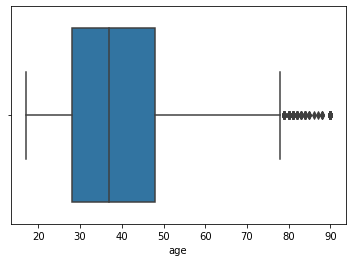

In [137]:
sns.boxplot(num_train['age'])

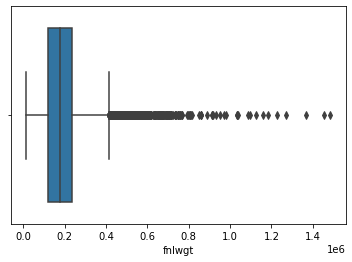

In [138]:
sns.boxplot(num_train['fnlwgt'])

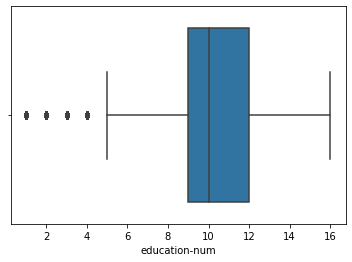

In [139]:
sns.boxplot(num_train['education-num'])

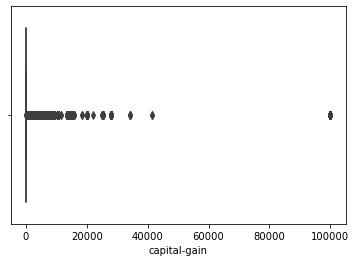

In [140]:
sns.boxplot(num_train['capital-gain'])

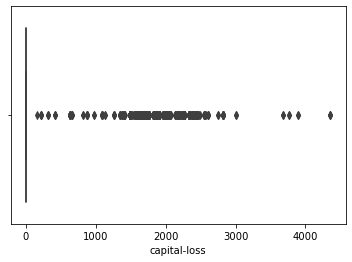

In [141]:
sns.boxplot(num_train['capital-loss'])

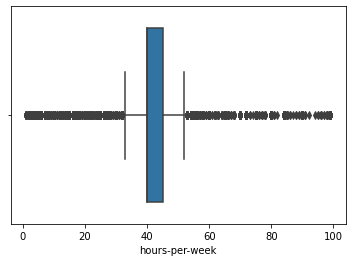

In [142]:
sns.boxplot(num_train['hours-per-week'])

# Removing Outliers from data

In [143]:
num_train1 = num_train.drop(['salary','fnlwgt','capital-gain','capital-loss','hours-per-week'], axis = 1)

In [144]:
z = np.abs(stats.zscore(num_train1))
print(z)

[[0.03067056 1.13473876]
 [0.83710898 1.13473876]
 [0.04264203 0.42005962]
 ...
 [1.42360965 0.42005962]
 [1.21564337 0.42005962]
 [0.98373415 0.42005962]]


In [145]:
threshold = 3
print(np.where(z > 3))

(array([  160,   221,   222,   224,   416,   430,   463,   486,   536,
         918,   929,   932,  1040,  1139,  1168,  1291,  1634,  1913,
        1935,  2303,  2581,  2584,  2671,  2754,  2817,  2861,  2884,
        2891,  2906,  2946,  3211,  3232,  3446,  3537,  3592,  3777,
        3941,  3963,  4070,  4107,  4109,  4303,  4326,  4524,  4718,
        4834,  5065,  5090,  5104,  5272,  5291,  5370,  5406,  5510,
        5665,  5734,  5741,  5834,  5842,  5877,  5958,  6214,  6232,
        6433,  6439,  6624,  6748,  6864,  7070,  7173,  7300,  7319,
        7481,  7720,  7730,  7739,  7850,  7872,  7894,  8080,  8088,
        8096,  8211,  8310,  8381,  8431,  8498,  8694,  8753,  8775,
        8806,  8886,  8887,  8963,  8973,  9000,  9018,  9471,  9658,
        9757,  9839,  9998, 10124, 10210, 10264, 10310, 10345, 10545,
       10559, 10714, 10971, 11134, 11238, 11294, 11297, 11360, 11512,
       11731, 11734, 11837, 11874, 11982, 11996, 12118, 12424, 12451,
       12492, 12619

In [146]:
num_train1 = num_train1[(z < 3).all(axis=1)]

In [147]:
num_train1['salary'] = train['salary']
num_train1['fnlwgt'] = train['fnlwgt']
num_train1['capital-gain'] = train['capital-gain']
num_train1['capital-loss'] = train['capital-loss']
num_train1['hours-per-week'] = train['hours-per-week']

# Exploration and Cleaning of Data

In [148]:
num_train1['age'].unique()

array([39, 50, 38, 53, 28, 37, 49, 52, 31, 42, 30, 23, 32, 40, 34, 25, 43,
       54, 35, 59, 56, 19, 20, 45, 22, 48, 21, 24, 57, 44, 41, 29, 18, 47,
       46, 36, 79, 27, 67, 33, 76, 17, 55, 61, 70, 64, 71, 66, 51, 58, 26,
       60, 75, 65, 77, 62, 63, 72, 74, 69, 68, 73, 78], dtype=int64)

In [149]:
bins = [0,20,35,50,60,100]

group = [1,2,3,4,5]

num_train1['Age'] = pd.cut(num_train1['age'], bins = bins, labels = group)

In [150]:
num_train1 = num_train1.drop(['age'], axis = 1)

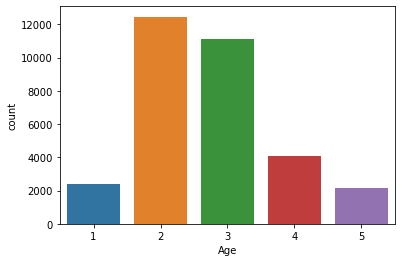

In [151]:
sns.countplot(num_train1['Age'])

In [152]:
num_train1['fnlwgt'].min()

12285

In [153]:
num_train1['fnlwgt'].max()

1484705

In [154]:
bins = [0,100000,500000,900000,1400000]


group = [1,2,3,4]

num_train1['Fnlwgt'] = pd.cut(num_train1['fnlwgt'], bins = bins, labels = group)

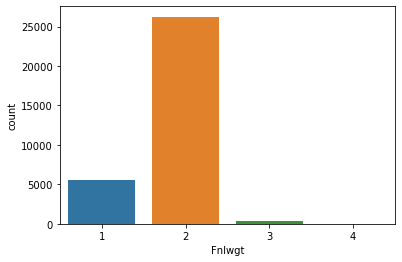

In [155]:
sns.countplot(num_train1['Fnlwgt'])

In [156]:
num_train1['education-num'].unique()

array([13,  9,  7, 14,  5, 10, 12, 11,  4, 16, 15,  3,  6,  8],
      dtype=int64)

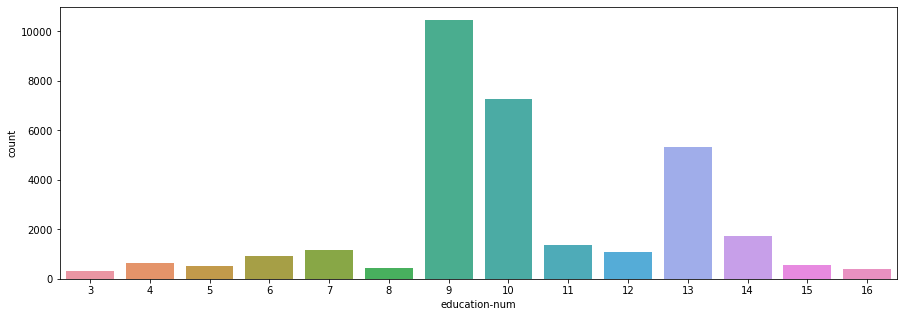

In [157]:
plt.figure(figsize = (15,5))
sns.countplot(num_train1['education-num'])

In [158]:
num_train1['capital-gain'].unique()

array([ 2174,     0, 14084,  5178,  5013,  2407, 14344, 15024,  7688,
       34095,  4064,  4386,  7298,  1409,  3674,  1055,  3464,  2050,
        2176,   594, 20051,  6849,  4101,  1111,  8614,  3411,  2597,
       25236,  4650,  9386,  2463,  3103, 10605,  2964,  3325,  2580,
        3471,  4865, 99999,  6514,  1471,  2329,  2105,  2885, 25124,
       10520,  2202,  2961, 27828,  6767,  2228,  1506, 13550,  2635,
        5556,  4787,  3781,  3137,  3818,  3942,   914,   401,  2829,
        2977,  4934,  2354,  5455, 15020,  1424,  3273, 22040,  4416,
        3908, 10566,  4931,  1086,  7430,  6497,   114,  7896,  2346,
        3418,  3432,  2907,  1151,  2414,  2290, 15831,  4508,  2538,
        3456,  6418,  1848,  3887,  5721,  9562,  1455,  2036,  1831,
       11678,  2936,  2993,  7443,  6360,  1797,  1173,  4687,  6723,
        2009,  6097,  2653,   991,  1639, 18481, 41310,  7978,  2387,
        5060], dtype=int64)

In [159]:
num_train1['capital-gain'].min()

0

In [160]:
num_train1['capital-gain'].max()

99999

In [161]:
bins = [0,1000,10000,20000,25000]
group = [1,2,3,4]

num_train1['capital-gain'] = pd.cut(num_train1['capital-gain'], bins = bins, labels = group)

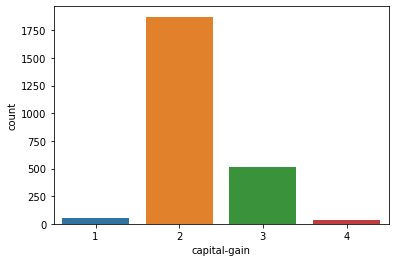

In [162]:
sns.countplot(num_train1['capital-gain'])

In [163]:
num_train1['capital-loss'].unique()

array([   0, 2042, 1408, 1902, 1573, 1887, 1719, 1762, 1564, 2179, 1816,
       1980, 1977, 1876, 1340, 1741, 1485, 2339, 2415, 1380, 1721, 2051,
       2377, 1669, 2352, 1672,  653, 2392, 1504, 2001, 1590, 1651, 1628,
       1848, 1740, 2002, 1579, 2258, 1602,  419, 2547, 2174, 2206, 2205,
       1726, 2444, 1138, 2238,  625,  213, 1539,  880, 1668, 1092, 1594,
       3004, 2231, 1844,  810, 2824, 2559, 2057, 1974,  974, 2149, 1825,
       1258, 2129, 2603, 2282,  323, 2246, 1617, 1648, 1735, 2489, 3770,
       1755, 3683, 2267, 2080, 2457,  155, 3900, 2201, 1944, 2467, 2163,
       2754, 2472, 4356, 1411], dtype=int64)

In [164]:
num_train1['capital-loss'].min()

0

In [165]:
num_train1['capital-loss'].max()

4356

In [166]:
bins = [0,100,500,700,1300]

group = [1,2,3,4]

num_train1['capital-loss'] = pd.cut(num_train1['capital-loss'], bins = bins, labels = group)

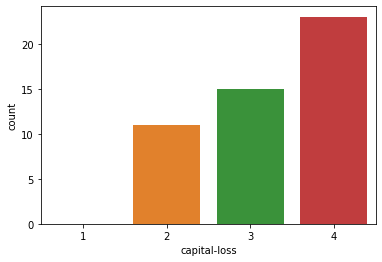

In [167]:
sns.countplot(num_train1['capital-loss'])

In [168]:
num_train1['hours-per-week'].unique()

array([40, 13, 16, 45, 50, 80, 30, 35, 60, 20, 52, 44, 15, 25, 38, 43, 55,
       48, 58, 32, 70,  2, 22, 56, 41, 28, 36, 24, 46, 42, 12, 65,  1, 10,
       34, 75, 98, 33, 54,  8,  6, 64, 19, 18, 72,  5,  9, 47, 37, 21, 26,
       14,  4, 59,  7, 99, 53, 39, 62, 57, 78, 90, 66, 11, 49, 84,  3, 17,
       68, 27, 85, 31, 51, 77, 63, 23, 87, 88, 73, 89, 97, 94, 29, 96, 67,
       82, 86, 91, 81, 76, 92, 61, 74, 95], dtype=int64)

In [169]:
num_train1['hours-per-week'].min()

1

In [170]:
num_train1['hours-per-week'].max()

99

In [171]:
bins = [0,15,30,50,75,100]

group = [1,2,3,4,5]

num_train1['hours-per-week'] = pd.cut(num_train1['hours-per-week'], bins = bins, labels = group)

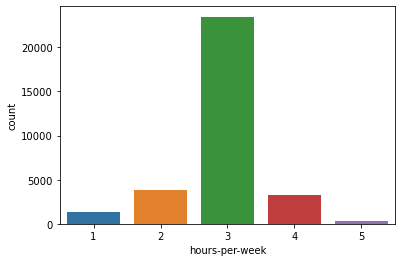

In [172]:
sns.countplot(num_train1['hours-per-week'])

# Dealing with object datatypes

In [173]:
cat_train = train.select_dtypes(object)

In [174]:
dum_train = pd.get_dummies(cat_train)

In [175]:
for i in cat_train.columns:
    if (cat_train[i].dtypes == 'object'):
        cat_train[i] = label.fit_transform(cat_train[i])

In [176]:
Labeled_train = pd.concat([num_train, cat_train], axis = 1)

In [177]:
Labeled_train.to_csv('Labelled_data.csv', index = False)

In [178]:
dummy_train = pd.concat([num_train,dum_train], axis = 1)

In [179]:
dummy_train.to_csv('dummy_data.csv', index = False)

# Data Splitting

# Without scalling the data

X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, Y1, test_size = 0.2, random_state = 50)

# Fitting data into Models

log = LR.fit(X_train1, y_train1)

y_pred1 = log.predict(X_test1)

In [75]:
print(confusion_matrix(y_test1, y_pred1))
print(classification_report(y_test1, y_pred1))

[[ 474 1071]
 [ 284 4684]]
              precision    recall  f1-score   support

           0       0.63      0.31      0.41      1545
           1       0.81      0.94      0.87      4968

    accuracy                           0.79      6513
   macro avg       0.72      0.62      0.64      6513
weighted avg       0.77      0.79      0.76      6513



# Over sampling with SMOTE without scalling

X_res, y_res = over_sample.fit_resample(X_train1, y_train1)

np.bincount(y_res)

log_res = LR.fit(X_res, y_res)

y_pred_res1 = log_res.predict(X_test1)

print(confusion_matrix(y_test1, y_pred_res1))
print(classification_report(y_test1, y_pred_res1))

# With Scaled Data

# Over sampling with SMOTE with scalling

# Dummy Function data without scalling

X2 = dummy_train.drop(['salary'], axis = 1)
Y2 = dummy_train['salary']

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, Y2, test_size = 0.2, random_state = 50)

log = LR.fit(X_train2, y_train2)

y_pred2 = log.predict(X_test2)

print(confusion_matrix(y_test2, y_pred2))
print(classification_report(y_test2, y_pred2))

# Over sampling with SMOTE without scalling

X_res1, y_res1 = over_sample.fit_resample(X_train2, y_train2)

log_res1 = LR.fit(X_res1, y_res1)

y_pred_res2 = log_res.predict(X_test2)

print(confusion_matrix(y_test2, y_pred_res2))
print(classification_report(y_test2, y_pred_res2))

X2 = ss.fit_transform(X2)

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, Y2, test_size = 0.2, random_state = 50)

log = LR.fit(X_train2, y_train2)

y_pred2 = log.predict(X_test2)

print(confusion_matrix(y_test2, y_pred2))
print(classification_report(y_test2, y_pred2))

# Over sampling with SMOTE with scalling

X_res1, y_res1 = over_sample.fit_resample(X_train2, y_train2)

log_res1 = LR.fit(X_res1, y_res1)

y_pred_res2 = log_res.predict(X_test2)

print(confusion_matrix(y_test2, y_pred_res2))
print(classification_report(y_test2, y_pred_res2))

# I choose dummy_train after observing the classification reports.

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn = knn.fit(X_train2, y_train2)
y_pred3 = knn.predict(X_test2)

print(confusion_matrix(y_test2, y_pred3))
print(classification_report(y_test2, y_pred3))

from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb = gnb.fit(X_train2, y_train2)
y_pred4 = gnb.predict(X_test2)

print(confusion_matrix(y_test2, y_pred4))
print(classification_report(y_test2, y_pred4))

from sklearn.svm import SVC
svc = SVC()
svc = svc.fit(X_train2, y_train2)
y_pred5 = svc.predict(X_test2)

print(confusion_matrix(y_test2, y_pred5))
print(classification_report(y_test2, y_pred5))

from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc = dtc.fit(X_train2, y_train2)
y_pred6 = dtc.predict(X_test2)

print(confusion_matrix(y_test2, y_pred6))
print(classification_report(y_test2, y_pred6))

from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc = rfc.fit(X_train2, y_train2)
y_pred7 = rfc.predict(X_test2)

print(confusion_matrix(y_test2, y_pred7))
print(classification_report(y_test2, y_pred7))